In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [ ]:
pip install -U fortran-magic

In [ ]:
%reload_ext fortranmagic

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):#My own example 1
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a,b) #My own example 2

NameError: name 'a' is not defined

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    if len(A[0])==len(B):#my own example 3
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    return "Matrix A and B can't be multiply"

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a,b)#my own example 4

NameError: name 'a' is not defined

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
# My own example 5
a = [[8, 2],
     [2, 3],
     [3, 6],
     [1, 7]]

b = [[9, 2, 2, 4],
     [2, 6, 4, 5]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a,b)#MY OWN EXAMPLE 6

CPU times: user 21 µs, sys: 3 µs, total: 24 µs
Wall time: 27.4 µs


[[76, 28, 24, 42], [24, 22, 16, 23], [39, 42, 30, 42], [23, 44, 30, 39]]

In [ ]:
import random
import time

In [ ]:
random.normalvariate(0,1)

-0.4553338518391466

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.37747141852264343, 0.3966268858635892, 0.5970190461038327],
 [0.5699282631554654, 0.9214686754764521, 0.17831163366443226]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
tiempo = 0
for i in range(10):
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)
  inicio = time.perf_counter()
  matmul(randa,randb)
  fin = time.perf_counter()
  tiempo+= fin-inicio
promedio=tiempo/10
print(f"El tiempo promedio es igual a: {promedio:.5f} segundos")

El tiempo promedio es igual a: 9.10451 segundos


In [ ]:
import pandas as pd


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
data = {"python": promedio}
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
print(df)

        Tiempo promedio
python         9.104511


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np
tiempo = 0
for i in range(10):
  randa = np.random.rand(600,100)
  randb = np.random.rand(100,600)
  inicio = time.perf_counter()
  np.dot(randa,randb)
  fin = time.perf_counter()
  tiempo+= fin-inicio
promedio=tiempo/10
print(f"El tiempo promedio es igual a: {promedio:.5f} segundos")
data["Numpy"]=promedio
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

El tiempo promedio es igual a: 0.00334 segundos


,Tiempo promedio
python,9.104511
Numpy,0.003336


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.67 s, sys: 39.2 ms, total: 9.7 s
Wall time: 9.79 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
!pip install fortran-magic
!apt-get install gfortran


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
%load_ext fortranmagic

In [ ]:
%reload_ext fortranmagic

In [ ]:
!pip install "setuptools <65"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0


In [ ]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/f4245c2e


In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.2 ms, sys: 1.02 ms, total: 13.2 ms
Wall time: 13.1 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 220 µs, sys: 0 ns, total: 220 µs
Wall time: 232 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A=[[3,7],
   [4,1]]
B=[[8,5],
   [5,6]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, out)
  implicit none
  integer, parameter :: rowsA = 2, colsA = 2, rowsB = 2, colsB = 2
  real, intent(in) :: A(rowsA,colsA), B(rowsB,colsB)
  real, intent(out) :: out(rowsA,colsB)
  integer :: i, j, k

  do i = 1, rowsA
    do j = 1, colsB
      do k = 1, colsA
        out(i,j) = out(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine fortran_matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
fortran_matmul(A,B)

array([[59., 57.],
       [37., 26.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A, B, out)
  implicit none
  integer, parameter :: rowsA = 600, colsA = 100, rowsB = 100, colsB = 600
  real, intent(in) :: A(rowsA, colsA), B(rowsB, colsB)
  real, intent(out) :: out(rowsA, colsB)
  integer :: i, j, k

  do i = 1, rowsA
    do j = 1, colsB
      do k = 1, colsA
        out(i,j) = out(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine fortran_matmul

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
A = random_matrix(600,100)
B = random_matrix(100,600)
fortran_matmul(A,B)

array([[25.390182, 25.141441, 23.327991, ..., 23.67105 , 26.494816,
        22.632364],
       [26.22069 , 26.813082, 25.057262, ..., 25.980808, 27.716228,
        26.73651 ],
       [29.185652, 31.2402  , 28.879612, ..., 27.813738, 30.533709,
        26.533081],
       ...,
       [26.069702, 27.286694, 25.164978, ..., 23.694872, 27.710955,
        24.746885],
       [26.601276, 26.55761 , 24.857864, ..., 24.238781, 25.827875,
        25.505793],
       [25.260637, 26.312191, 23.990288, ..., 24.348629, 26.141165,
        22.5024  ]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import numpy as np
tiempo = 0
for i in range(10):
  A = random_matrix(600,100)
  B = random_matrix(100,600)
  inicio = time.perf_counter()
  fortran_matmul(A,B)
  fin = time.perf_counter()
  tiempo+= fin-inicio
promedio=tiempo/10
print(f"El tiempo promedio es igual a: {promedio:.5f} segundos")
data["fortan magic"]=promedio
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

El tiempo promedio es igual a: 0.05139 segundos


,Tiempo promedio
python,9.104511
Numpy,0.003336
fortan magic,0.051392


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiply2.f90
program matrix_multiplication
  implicit none
  integer, parameter :: rows_A = 600, cols_A = 100, rows_B = 100, cols_B = 600
  real(8) :: A(rows_A, cols_A), B(rows_B, cols_B), C(rows_A, cols_B)
  real(8) :: start, finish, total_time
  integer :: i, j, k, cycle
  total_time = 0.0

  ! Inicialización de las matrices A y B con valores aleatorios
  call random_seed()
  call random_number(A)
  call random_number(B)

  ! Ciclo para multiplicar matrices 10 veces y registrar el tiempo
  do cycle = 1, 10
    call cpu_time(start) ! Registrar el tiempo de inicio

    ! Multiplicación de matrices C = A * B
    C = 0.0
    do i = 1, rows_A
      do j = 1, cols_B
        do k = 1, cols_A
          C(i,j) = C(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do

    call cpu_time(finish) ! Registrar el tiempo de fin

    ! Acumular el tiempo de ejecución
    total_time = total_time + (finish - start)
    print *, "Tiempo de ejecución: ", (finish - start), " segundos."
  end do

  ! Calcular el promedio de tiempo de ejecución
  print *, "Promedio del tiempo de ejecución:", total_time / 10.0, " segundos."

end program matrix_multiplication

Overwriting matrix_multiply2.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran -O3 -o matrix_multiply2 matrix_multiply2.f90
!./matrix_multiply2

 Tiempo de ejecución:    4.5030000000000001E-002  segundos.
 Tiempo de ejecución:    4.5476000000000003E-002  segundos.
 Tiempo de ejecución:    4.5047000000000004E-002  segundos.
 Tiempo de ejecución:    4.2422000000000015E-002  segundos.
 Tiempo de ejecución:    4.6083000000000013E-002  segundos.
 Tiempo de ejecución:    4.3235000000000023E-002  segundos.
 Tiempo de ejecución:    4.7653000000000001E-002  segundos.
 Tiempo de ejecución:    4.3640000000000012E-002  segundos.
 Tiempo de ejecución:    4.1957999999999995E-002  segundos.
 Tiempo de ejecución:    4.3325000000000002E-002  segundos.
 Promedio del tiempo de ejecución:   4.4386900000000007E-002  segundos.


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
import pandas as pd
import subprocess
import numpy as np
# Ejecutar el programa Fortran
result = subprocess.run(['./matrix_multiply2'], capture_output=True, text=True)

# Leer la salida y capturar el tiempo promedio de ejecución
output = result.stdout

# Buscar la línea que contiene el tiempo promedio
for line in output.splitlines():
    if "Promedio del tiempo de ejecución:" in line:
        total_time = float(line.split(':')[1].strip().split()[0])
        print(f"Tiempo de ejecución promedio de Fortran: {total_time} segundos")

data["Fortran"]=total_time
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df


Tiempo de ejecución promedio de Fortran: 0.043652199999999995 segundos


,Tiempo promedio
python,9.104511
Numpy,0.003336
fortan magic,0.051392
Fortran,0.043652


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmulC.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

int main() {
    int i, j, k, sum;
    int **A, **B, **C;
    clock_t start, end;
    double avg = 0;

    // Asignar memoria para las matrices A, B y C
    A = (int **)malloc(ROWS_A * sizeof(int *));
    B = (int **)malloc(ROWS_B * sizeof(int *));
    C = (int **)malloc(ROWS_A * sizeof(int *));
    for (i = 0; i < ROWS_A; i++) {
        A[i] = (int *)malloc(COLS_A * sizeof(int));
        C[i] = (int *)malloc(COLS_B * sizeof(int));
    }
    for (i = 0; i < ROWS_B; i++) {
        B[i] = (int *)malloc(COLS_B * sizeof(int));
    }

    // Inicializar las matrices A y B
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i][j] = i + j;
        }
    }
    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i][j] = i - j;
        }
    }

    // Multiplicar las matrices 10 veces y medir el tiempo de ejecución
    for (k = 0; k < 10; k++) {
        start = clock();

        for (i = 0; i < ROWS_A; i++) {
            for (j = 0; j < COLS_B; j++) {
                sum = 0;
                for (int x = 0; x < COLS_A; x++) {
                    sum += A[i][x] * B[x][j];
                }
                C[i][j] = sum;
            }
        }

        end = clock();
        avg += ((double) (end - start)) / CLOCKS_PER_SEC;
    }

    // Calcular el promedio de la ejecución y guardar en un archivo txt
    avg /= 10;
    FILE *fp;
    fp = fopen("averageinC.txt", "w");
    fprintf(fp, "%f", avg);
    fclose(fp);

    // Liberar la memoria
    for (i = 0; i < ROWS_A; i++) {
        free(A[i]);
        free(C[i]);
    }
    for (i = 0; i < ROWS_B; i++) {
        free(B[i]);
    }
    free(A);
    free(B);
    free(C);

    return 0;
}

Writing matmulC.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matmulC.c -o matmulC
!./matmulC

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
file = open('averageinC.txt','r')
avg_TimeC= float(file.readline())
data["C"]=avg_TimeC
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,9.104511
Numpy,0.003336
fortan magic,0.051392
Fortran,0.043652
C,0.143815


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul.cpp
#include <iostream>
#include <fstream>
#include <ctime>
using namespace std;

const int ROWS_A = 600;
const int COLS_A = 100;
const int ROWS_B = 100;
const int COLS_B = 600;

int main() {
    int i, j, k, sum;
    int **A, **B, **C;
    clock_t start, end;
    double avg = 0;

    // Asignar memoria para las matrices A, B y C
    A = new int*[ROWS_A];
    B = new int*[ROWS_B];
    C = new int*[ROWS_A];
    for (i = 0; i < ROWS_A; i++) {
        A[i] = new int[COLS_A];
        C[i] = new int[COLS_B];
    }
    for (i = 0; i < ROWS_B; i++) {
        B[i] = new int[COLS_B];
    }

    // Inicializar las matrices A y B
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i][j] = i + j;
        }
    }
    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i][j] = i - j;
        }
    }
        // Multiplicar las matrices 10 veces y medir el tiempo de ejecución
    for (k = 0; k < 10; k++) {
        start = clock();

        for (i = 0; i < ROWS_A; i++) {
            for (j = 0; j < COLS_B; j++) {
                sum = 0;
                for (int x = 0; x < COLS_A; x++) {
                    sum += A[i][x] * B[x][j];
                }
                C[i][j] = sum;
            }
        }

        end = clock();
        avg += ((double) (end - start)) / CLOCKS_PER_SEC;
    }

    // Calcular el promedio de la ejecución y guardar en un archivo txt
    avg /= 10;
    ofstream myfile("promediocmasmas.txt");
    myfile <<avg;
    myfile.close();

    // Liberar la memoria
    for (i = 0; i < ROWS_A; i++) {
        delete[] A[i];
        delete[] C[i];
    }
    for (i = 0; i < ROWS_B; i++) {
        delete[] B[i];
    }
    delete[] A;
    delete[] B;
    delete[] C;

    return 0;
}

Writing matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ matmul.cpp -o matmul
!./matmul

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
file = open('promediocmasmas.txt','r')
avg_TimeCplusplus= float(file.readline())
data["C++"]=avg_TimeCplusplus
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,9.104511
Numpy,0.003336
fortan magic,0.051392
Fortran,0.043652
C,0.143815
C++,0.132313


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMuljava.java
import java.io.FileWriter;
import java.io.IOException;
import java.io.PrintWriter;
import java.util.Random;

public class MatMuljava {
    private static final int ROWS_A = 600;
    private static final int COLS_A = 100;
    private static final int ROWS_B = 100;
    private static final int COLS_B = 600;

    public static void main(String[] args) {
        int[][] A = new int[ROWS_A][COLS_A];
        int[][] B = new int[ROWS_B][COLS_B];
        int[][] C = new int[ROWS_A][COLS_B];
        long startTime, endTime, totalTime = 0;

        // Inicializar las matrices A y B
        Random rand = new Random();
        for (int i = 0; i < ROWS_A; i++) {
            for (int j = 0; j < COLS_A; j++) {
                A[i][j] = rand.nextInt(10) + 1; // valores aleatorios entre 1 y 10
            }
        }
        for (int i = 0; i < ROWS_B; i++) {
            for (int j = 0; j < COLS_B; j++) {
                B[i][j] = rand.nextInt(10) + 1; // valores aleatorios entre 1 y 10
            }
        }

              // Multiplicar las matrices 10 veces y medir el tiempo de ejecución
        for (int k = 0; k < 10; k++) {
            startTime = System.nanoTime();

            for (int i = 0; i < ROWS_A; i++) {
                for (int j = 0; j < COLS_B; j++) {
                    int sum = 0;
                    for (int x = 0; x < COLS_A; x++) {
                        sum += A[i][x] * B[x][j];
                    }
                    C[i][j] = sum;
                }
            }

            endTime = System.nanoTime();
            totalTime += (endTime - startTime);
        }

        // Calcular el promedio de la ejecución y guardar en un archivo txt
        double averageTime = (double) totalTime / (10 * 1_000_000_000);
        try {
            PrintWriter writer = new PrintWriter(new FileWriter("promediojava.txt"));
            writer.println(averageTime);
            writer.close();
        } catch (IOException e) {
            System.err.println("Error al escribir el archivo.");
        }
    }
}

Writing MatMuljava.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatMuljava.java
!java MatMuljava

**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
file = open('promediojava.txt','r')
avg_TimeJava= float(file.readline())
data["Java"]=avg_TimeJava
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,9.104511
Numpy,0.003336
fortan magic,0.051392
Fortran,0.043652
C,0.143815
C++,0.132313
Java,0.547154


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMul.js
const fs = require('fs');

const ROWS_A = 600;
const COLS_A = 100;
const ROWS_B = 100;
const COLS_B = 600;

const A = Array.from({length: ROWS_A}, () =>
  Array.from({length: COLS_A}, () => Math.floor(Math.random() * 10) + 1)
);

const B = Array.from({length: ROWS_B}, () =>
  Array.from({length: COLS_B}, () => Math.floor(Math.random() * 10) + 1)
);

const C = Array.from({length: ROWS_A}, () => Array.from({length: COLS_B}, () => 0));

let totalTime = 0;

for (let k = 0; k < 10; k++) {
  const startTime = process.hrtime.bigint();

  for (let i = 0; i < ROWS_A; i++) {
    for (let j = 0; j < COLS_B; j++) {
      let sum = 0;
      for (let x = 0; x < COLS_A; x++) {
        sum += A[i][x] * B[x][j];
      }
      C[i][j] = sum;
    }
  }

  const endTime = process.hrtime.bigint();
  totalTime += Number(endTime - startTime);
}

const averageTime = totalTime / (10 * 1e9);
let avg = averageTime.toString();

fs.writeFile('promediojs.txt',avg, (err) => {
  if (err) throw err;
  console.log(averageTime);
});

Writing MatMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node MatMul.js

0.1803387204


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
file = open('promediojs.txt','r')
avg_TimeJS= float(file.readline())
data["JavaScript"]=avg_TimeJS
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,9.104511
Numpy,0.003336
fortan magic,0.051392
Fortran,0.043652
C,0.143815
C++,0.132313
Java,0.547154
JavaScript,0.180339


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
minimun = df['Tiempo promedio'].min()
minimun

0.003336207900065347

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
factor = (df['Tiempo promedio']/minimun)
df['factor velocidad']=factor
df

NameError: name 'df' is not defined

**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df = df.sort_values('Tiempo promedio')
df

,Tiempo promedio,factor velocidad
Numpy,0.003336,1.000000
Fortran,0.043652,13.084376
fortan magic,0.051392,15.404196
C++,0.132313,39.659699
C,0.143815,43.107326
JavaScript,0.180339,54.055001
Java,0.547154,164.004712
python,9.104511,2729.000017


**LAB2 AVOCADOS Y DATAFRAME PÁGINA DEL GOBIERNO**

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
## Needed Libraries.
from urllib.parse import urlencode
import pandas as pd

import requests

## In this case, we will obtain TOMATOES data.
base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
query_params = {
  'class': ['VEGETABLES'], ## Change Fruit with Vegetables
  'commodity': ['TOMATOES'], ## Change Avocados with Tomatoes
  'compareLy': ['No'],
  'endDate': ['01/01/2021'], ## Hardcoding end Date
  'repDate': ['01/01/2020'], ## Hardcoding rep Date
  'format': ['excel'],
  'organic': ['ALL'],
  'portal': ['fv'],
  'region': ['ALL'],
  'type': ['retail'],
}

## Build URL to send request.
url = base_url + '?' + urlencode(query_params, doseq=1)

## Request data from url
resp = requests.get(url, stream=True)

## Create File with data.
with open('data.html', 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
            f.close()

## Read data from file.
tomatoes_data = pd.read_html('data.html', header=0)[0]
## Be careful, this data is uncleaned, If you want to use it correctly, you will first have to clean it


## You now have data of tomatoes in the United States! Hurra!

In [ ]:
tomatoes_data

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,212,1.81,NaN,NaN,NaN
1,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,NaN,NaN,per pound,46,3.34,NaN,NaN,NaN
2,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,Y,NaN,per pound,23,3.99,NaN,NaN,NaN
3,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,NaN,NaN,per pound,2255,1.66,NaN,NaN,NaN
4,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,Y,Greenhouse,per pound,245,1.48,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,VINE RIPES,NaN,Greenhouse,per pound,10,2.49,2.49,2.49,NaN
1919,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,250,1.92,1.49,1.99,NaN
1920,01/01/2021,HAWAII,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,4,2.29,2.29,2.29,NaN
1921,01/01/2021,ALASKA,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,34,2.49,2.39,2.49,NaN


In [8]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

def read_data_json(cache_loc='data.json'):
    """Download data (in JSON format) to a dataframe.
    Parameters
    ----------
    cache_loc : str
        The location to cache the downloaded file locally.
    Returns
    -------
    pd.DataFrame
        A dataframe with the cleaned data.
    """
    # URL del nuevo recurso JSON
    url = 'https://www.datos.gov.co/resource/a4bc-a9tq.json'

    # Verificar si el archivo ya está en caché
    if not os.path.exists(cache_loc):
        # Descargar los datos JSON
        resp = requests.get(url)
        resp.raise_for_status()

        # Guardar el archivo JSON en la ubicación de caché
        with open(cache_loc, 'wb') as f:
            f.write(resp.content)

    # Leer los datos JSON en un DataFrame de pandas
    frame = pd.read_json(cache_loc)

    # Ejemplo de limpieza de datos (modificar según la estructura del JSON)
    # Aquí convertimos alguna columna de fecha si existe
    if 'fecha_de_ocurrencia' in frame.columns:  # Cambia 'fecha' por el nombre correcto de la columna
        frame['fecha_de_ocurrencia'] = pd.to_datetime(frame['fecha_de_ocurrencia'], errors='coerce')

    # Ejemplo de eliminación de columnas innecesarias
    # Modifica 'column1', 'column2', etc., por los nombres reales de las columnas que no te sirvan
    columns_to_drop = ['column1', 'column2']  # Ajusta según las columnas reales
    frame.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

    return frame

# Uso de la función
data = read_data_json()
print(data.head())



  fecha_de_ocurrencia estado_del_evento      fecha_de_conclusion  \
0          2020-01-10          ATENDIDO  2020-01-10T00:00:00.000   
1          2020-01-12          ATENDIDO  2020-01-12T00:00:00.000   
2          2020-01-12          ATENDIDO  2020-01-12T00:00:00.000   
3          2020-01-13          ATENDIDO  2020-01-14T00:00:00.000   
4          2020-01-14          ATENDIDO  2020-01-14T00:00:00.000   

        tipo_de_evento causa_probable              conocido_atendido  \
0    INCENDIO FORESTAL  INDETERMINADO                CMGRD DE CHARTA   
1  ACCIDENTE VEHICULAR  INDETERMINADO             CMGRD DE LA BELLEZ   
2    INCENDIO FORESTAL  INDETERMINADO            BOMBEROS DE MATANZA   
3    INCENDIO FORESTAL  INDETERMINADO  BOMBEROS DE SURATA Y EJERCITO   
4    INCENDIO FORESTAL  INDETERMINADO        BOMBEROS DE PIEDECUESTA   

  autoridad_ambiental    municipio area_de_incidencia  \
0                CDMB       CHARTA              RURAL   
1                 CAS   LA BELLEZA          

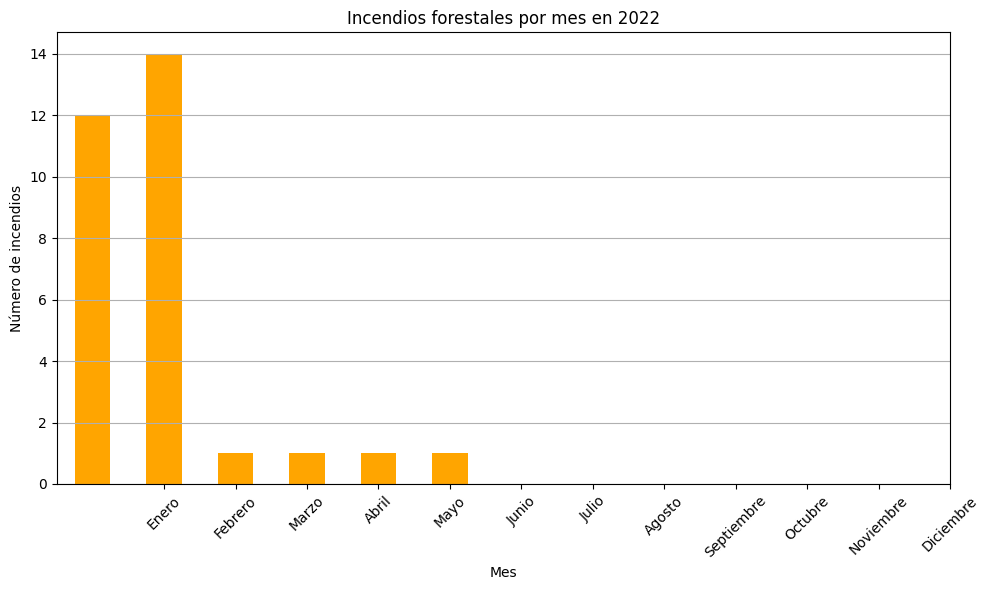

In [9]:
# Descargar y cargar los datos
data = read_data_json()

# Filtrar los datos para incluir solo los incendios forestales en 2022
# 'tipo_de_evento' es la columna que indica el tipo de incidente,
# y 'INCENDIO FORESTAL' es el valor correspondiente a incendios forestales.
incendios_2022 = data[(data['fecha_de_ocurrencia'].dt.year == 2022) & (data['tipo_de_evento'] == 'INCENDIO FORESTAL')]

# Crear una serie con el número de incendios por mes en 2022
incendios_por_mes = incendios_2022.groupby(incendios_2022['fecha_de_ocurrencia'].dt.month).size()

# Graficar los incendios forestales en 2022 por mes
plt.figure(figsize=(10, 6))
incendios_por_mes.plot(kind='bar', color='orange')
plt.title('Incendios forestales por mes en 2022')
plt.xlabel('Mes')
plt.ylabel('Número de incendios')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

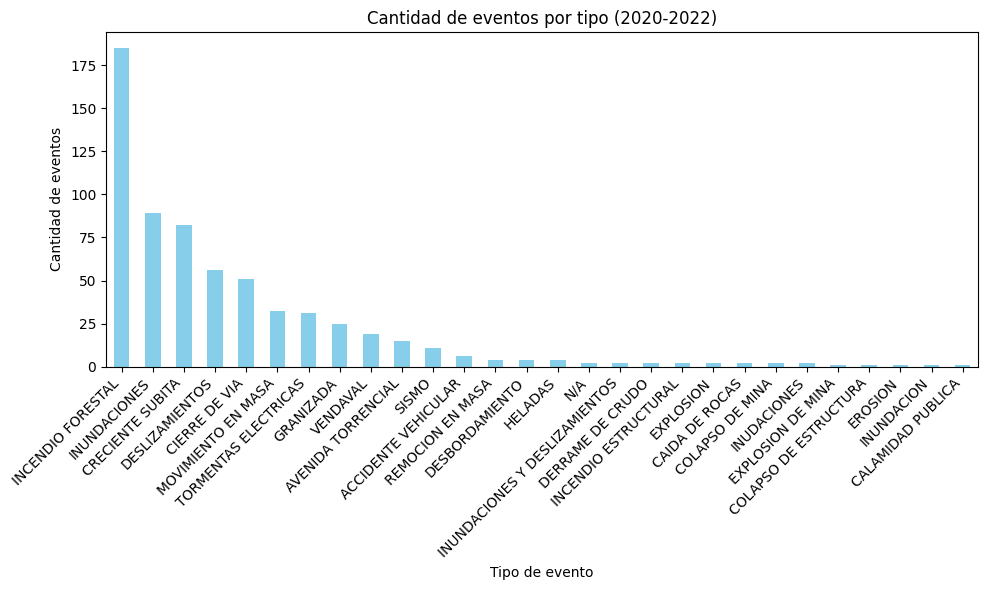

In [10]:
# Descargar y cargar los datos
data = read_data_json()

# Filtrar los datos para incluir solo los eventos entre 2020 y 2022
filtered_data = data[(data['fecha_de_ocurrencia'].dt.year >= 2020) & (data['fecha_de_ocurrencia'].dt.year <= 2022)]

# Contar el número de eventos por cada tipo de evento
event_counts = filtered_data['tipo_de_evento'].value_counts()

# Graficar los tipos de eventos entre 2020 y 2022
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de eventos por tipo (2020-2022)')
plt.xlabel('Tipo de evento')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

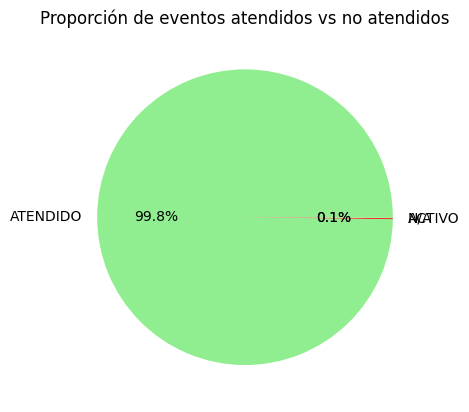

In [14]:
atendidos_vs_no_atendidos = data['estado_del_evento'].value_counts()
atendidos_vs_no_atendidos.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Proporción de eventos atendidos vs no atendidos')
plt.ylabel('')
plt.show()


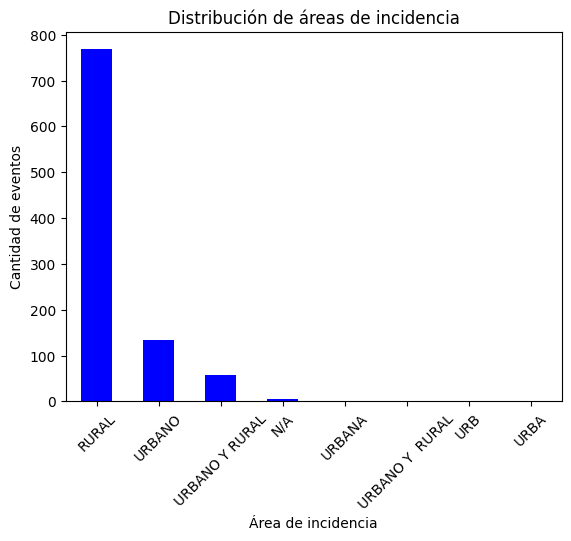

In [13]:
data['area_de_incidencia'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribución de áreas de incidencia')
plt.xlabel('Área de incidencia')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.show()


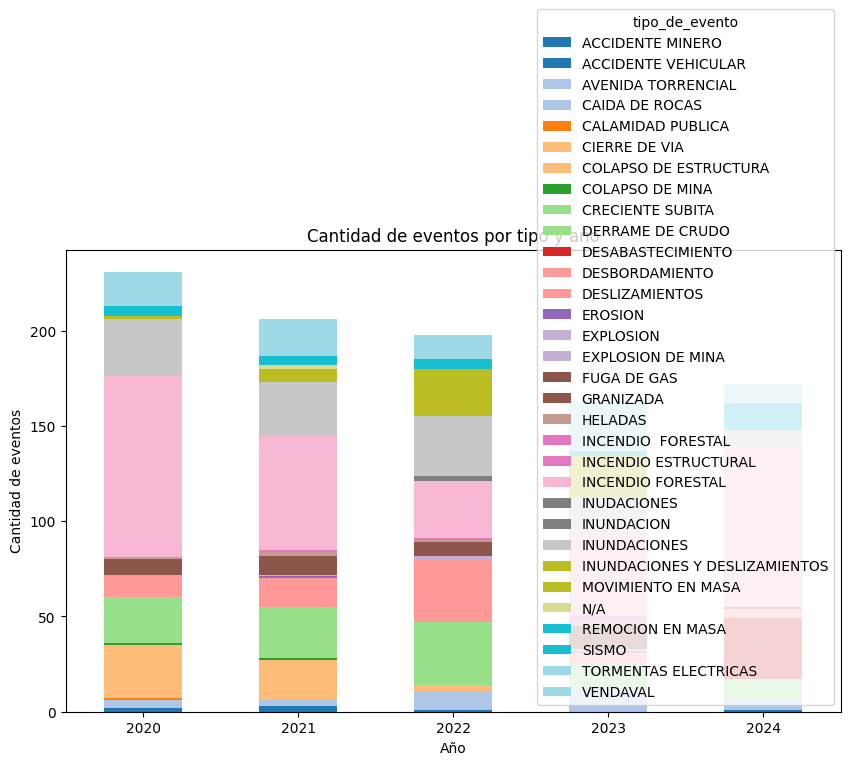

In [19]:
events_by_type_and_year = data.groupby([data['fecha_de_ocurrencia'].dt.year, 'tipo_de_evento']).size().unstack()
events_by_type_and_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Cantidad de eventos por tipo y año')
plt.xlabel('Año')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=0)
plt.show()

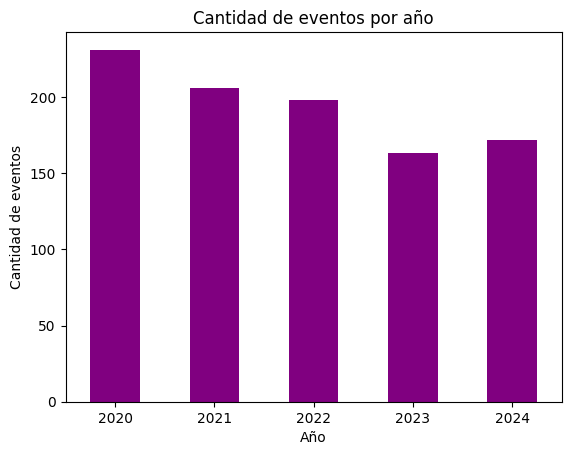

In [15]:
events_per_year = data['fecha_de_ocurrencia'].dt.year.value_counts().sort_index()
events_per_year.plot(kind='bar', color='purple')
plt.title('Cantidad de eventos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

NameError: name 'array_data' is not defined

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

NameError: name 'fortran_dot_product' is not defined

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

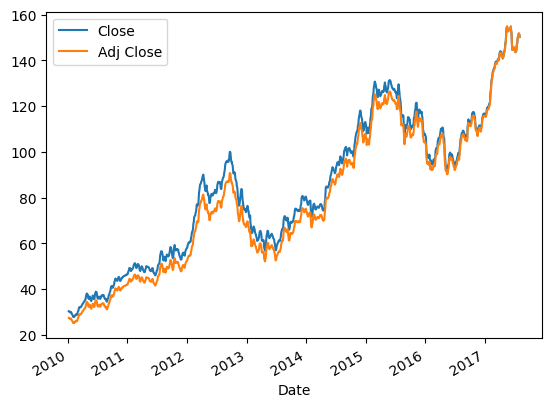

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

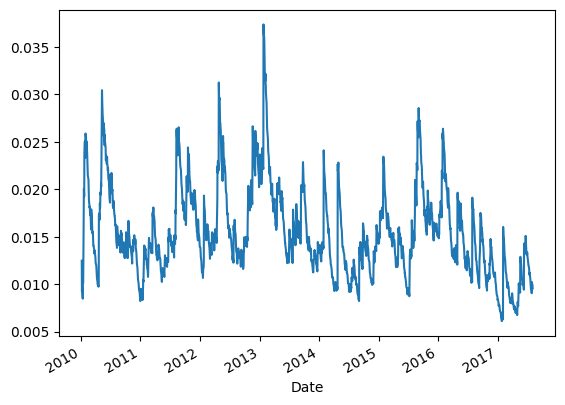

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: No module named 'demos'

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

NameError: name 'avocados' is not defined

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!